In [ ]:
from google.colab import files

!pip install -q kaggle

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot -f "Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv"

!unzip DNN-EdgeIIoT-dataset.csv.zip

!rm DNN-EdgeIIoT-dataset.csv.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot
License(s): CC-BY-NC-SA-4.0
 94% 279M/297M [00:05<00:00, 60.7MB/s]
100% 297M/297M [00:05<00:00, 55.1MB/s]
Archive:  DNN-EdgeIIoT-dataset.csv.zip
  inflating: DNN-EdgeIIoT-dataset.csv  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('DNN-EdgeIIoT-dataset.csv', low_memory=False)

In [ ]:
# Tune datset & remove **** columns/rows

from sklearn.utils import shuffle


# List of columns to remove
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]


df.drop(drop_columns, axis=1, inplace=True) # drop colomns

df.dropna(axis=0, how='any', inplace=True) # removes the rows that contains NULL value

df.drop_duplicates(subset=None, keep="first", inplace=True) # drop duplicated rown.

In [ ]:
print(df['Attack_type'].value_counts())


In [ ]:
dfTest = df.copy()

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(dfTest,'http.request.method')

encode_text_dummy(dfTest,'http.referer')

encode_text_dummy(dfTest,"http.request.version")

encode_text_dummy(dfTest,"dns.qry.name.len")

encode_text_dummy(dfTest,"mqtt.conack.flags")

encode_text_dummy(dfTest,"mqtt.protoname")

encode_text_dummy(dfTest,"mqtt.topic")

In [ ]:
from sklearn.preprocessing import LabelEncoder

dfdf = dfTest.copy()
label_encoder = LabelEncoder()
dfdf['Attack_type']= label_encoder.fit_transform(dfdf['Attack_type'])


In [ ]:
attackName = dfTest['Attack_type'].unique()
attackCode = dfdf['Attack_type'].unique()

In [ ]:
for i in range (len(attackCode)):
    print("code : {}\t=>  {} ".format(attackCode[i],attackName[i]))

code : 7	=>  Normal 
code : 6	=>  MITM 
code : 12	=>  Uploading 
code : 10	=>  Ransomware 
code : 11	=>  SQL_injection 
code : 1	=>  DDoS_HTTP 
code : 3	=>  DDoS_TCP 
code : 8	=>  Password 
code : 9	=>  Port_Scanning 
code : 13	=>  Vulnerability_scanner 
code : 0	=>  Backdoor 
code : 14	=>  XSS 
code : 5	=>  Fingerprinting 
code : 4	=>  DDoS_UDP 
code : 2	=>  DDoS_ICMP 


In [ ]:
dfNormal = dfdf[dfdf["Attack_type"]==7]
dfDDoS_ICMP = dfdf[dfdf["Attack_type"]==8]
dfPassword = dfdf[dfdf["Attack_type"]==2]
dfDDoS_HTTP = dfdf[dfdf["Attack_type"]==1]
dfSQL_injection = dfdf[dfdf["Attack_type"]==11]
dfDDoS_TCP = dfdf[dfdf["Attack_type"]==3]
dfDDoS_UDP = dfdf[dfdf["Attack_type"]==4]
dfUploading = dfdf[dfdf["Attack_type"]==12]
dfPort_Scanning = dfdf[dfdf["Attack_type"]==9]
dfRansomware = dfdf[dfdf["Attack_type"]==10]
dfXSS = dfdf[dfdf["Attack_type"]==14]
dfBackdoor = dfdf[dfdf["Attack_type"]==0]
dfVulnerability_scanner = dfdf[dfdf["Attack_type"]==13]
dfFingerprinting = dfdf[dfdf["Attack_type"]==5]
dfMITM = dfdf[dfdf["Attack_type"]==6]

In [ ]:
from sklearn.utils import resample
Re_dfNormal = resample(dfNormal, n_samples=10000,random_state=123, replace=True)

Re_dfMITM = resample(dfMITM, n_samples=2000,random_state=123, replace=True)
Re_dfDDoS_ICMP = resample(dfDDoS_ICMP, n_samples=2000,random_state=123, replace=True)
Re_dfPassword = resample(dfPassword, n_samples=2000,random_state=123, replace=True)
Re_dfDDoS_HTTP = resample(dfDDoS_HTTP, n_samples=2000,random_state=123, replace=True)
Re_dfSQL_injection = resample(dfSQL_injection, n_samples=2000,random_state=123, replace=True)
Re_dfDDoS_TCP = resample(dfDDoS_TCP, n_samples=2000,random_state=123, replace=True)
Re_dfDDoS_UDP = resample(dfDDoS_UDP, n_samples=2000,random_state=123, replace=True)
Re_dfUploading = resample(dfUploading, n_samples=2000,random_state=123, replace=True)
Re_dfPort_Scanning = resample(dfPort_Scanning, n_samples=2000,random_state=123, replace=True)
Re_dfRansomware = resample(dfRansomware, n_samples=2000,random_state=123, replace=True)
Re_dfXSS = resample(dfXSS, n_samples=2000,random_state=123, replace=True)
Re_dfBackdoor = resample(dfBackdoor, n_samples=2000,random_state=123, replace=True)
Re_dfVulnerability_scanner = resample(dfVulnerability_scanner, n_samples=2000,random_state=123, replace=True)
Re_dfFingerprinting = resample(dfFingerprinting, n_samples=2000,random_state=123, replace=True)


In [ ]:
dataset = pd.concat([Re_dfNormal,Re_dfMITM,Re_dfDDoS_ICMP,Re_dfPassword,
                           Re_dfDDoS_HTTP,Re_dfSQL_injection,Re_dfDDoS_TCP ,
                           Re_dfDDoS_UDP,Re_dfUploading ,Re_dfPort_Scanning,
                           Re_dfRansomware,Re_dfXSS,Re_dfBackdoor,
                           Re_dfVulnerability_scanner,Re_dfFingerprinting])


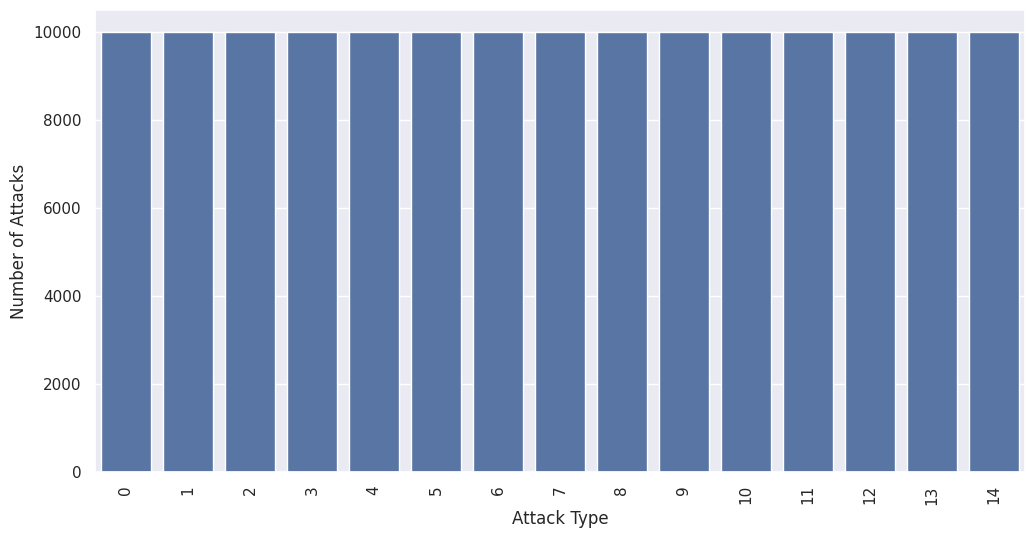

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Attack_type', data=dataset)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical # Import to_categorical for one-hot encoding

 #Étape 1 : Division du dataset en fonction des groupes d'attaques

def divide_dataset_by_attack(dataset, attack_groups):
    categories_data = []
    for group in attack_groups:
        filtered_data = dataset[dataset['Attack_type'].isin(group)]
        categories_data.append(filtered_data)
    return categories_data

# Définir les groupes d'attaques
attack_groups = [
    [0,1,2,5,6,7,8,9,10],
    [3,7,8,9,10,11,12,13,6],
    [11,10,12,14,0,1,2,5,7],

]

# Charger le dataset
# dataset = pd.read_csv('votre_dataset.csv')  # Remplacez par le chargement réel des données
categories_data = divide_dataset_by_attack(dataset, attack_groups)

largest_category_index = np.argmax([len(df) for df in categories_data]) # Now categories_data is defined
categorie_test = largest_category_index

# Optionally, print the size of each category to verify
list_categories_data=[]
for i, category_data in enumerate(categories_data):
    print(f"Category {i+1} has {len(category_data)} samples")
    list_categories_data.append(len(categories_data))

Category 1 has 90000 samples
Category 2 has 90000 samples
Category 3 has 80000 samples


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import os

# Number of rounds and categories
num_rounds = 20
# n_categories = 4 # Original line causing the error
n_categories = len(attack_groups)  # Set n_categories to the length of attack_groups
categories_data = divide_dataset_by_attack(dataset, attack_groups)

# Preparing the data
X_categories = []
y_categories = []

for i in range(n_categories):
    if categories_data[i] is not None:
        X_categories.append(categories_data[i].drop(columns=['Attack_type']))
        y_categories.append(categories_data[i]['Attack_type'])
    else:
        raise ValueError(f"categories_data[{i}] is None. Please provide the actual data.")

# Scaling and encoding
scaler = StandardScaler()
label_encoder = LabelEncoder()

for i in range(n_categories):
    X_categories[i] = scaler.fit_transform(X_categories[i])
    y_categories[i] = label_encoder.fit_transform(y_categories[i])
    y_categories[i] = to_categorical(y_categories[i], num_classes=15)  # Assuming 15 classes

# Split data into train and test sets for each client
X_train_categories = []
X_test_categories = []
y_train_categories = []
y_test_categories = []

for i in range(n_categories):
    X_train, X_test, y_train, y_test = train_test_split(X_categories[i], y_categories[i], test_size=0.3, random_state=42)
    X_train_categories.append(X_train)
    X_test_categories.append(X_test)
    y_train_categories.append(y_train)
    y_test_categories.append(y_test)

# Initialize the global model
def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=6, activation='relu', padding='same', input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', padding='same'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

    model.add(Conv1D(filters=128, kernel_size=6, activation='relu', padding='same'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

    model.add(Conv1D(filters=256, kernel_size=6, activation='relu', padding='same'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
    model.add(Conv1D(filters=256, kernel_size=6, activation='relu', padding='same'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))
    return model

input_shape = (X_train_categories[0].shape[1], 1)
global_model = create_model(input_shape)
global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Save the best global model
checkpoint_path = "best_global_model.keras"  # Change the file extension to .keras
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=0)
global_accuracies = []
global_losses = []
# Training process (Federated Learning on multiple rounds)
for round in range(num_rounds):
    print(f"Starting Round {round + 1}/{num_rounds}...")
    local_weights = []

    # Train each category's local model
    for i in range(n_categories):
        print(f"Training local model for Category {i + 1}...")

        # Create and compile a new local model
        model = create_model(input_shape)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.set_weights(global_model.get_weights())  # Set global model weights to local model

        # Train the local model
        model.fit(X_train_categories[i], y_train_categories[i], epochs=1, batch_size=32, verbose=1)

        # Collect the local model's weights for aggregation
        local_weights.append(model.get_weights())

    # Aggregate weights (average the weights of the local models)
    new_weights = []
    for layer_index in range(len(local_weights[0])):  # Iterate through each layer
        layer_weights = [local_weights[i][layer_index] for i in range(n_categories)]  # Collect weights for the same layer from each model
        averaged_layer_weights = np.mean(layer_weights, axis=0)  # Average the weights for this layer
        new_weights.append(averaged_layer_weights)  # Add the averaged weights to new_weights list

    # Set the global model's weights to the aggregated weights
    global_model.set_weights(new_weights)
    global_model.save(checkpoint_path)

    print(f"Round {round + 1} completed. Evaluating the global model...")

    # Evaluation of the global model on each category's test data
    for i in range(n_categories):
        loss, accuracy = global_model.evaluate(X_test_categories[i], y_test_categories[i], verbose=1)
        print(f"Category {i + 1} - Test Loss: {loss}, Test Accuracy: {accuracy}")

    # Combine all test data and evaluate the global model on the combined data
    X_test_global = np.concatenate(X_test_categories, axis=0)
    y_test_global = np.concatenate(y_test_categories, axis=0)

    # Evaluate the global model on all test data combined
    global_loss, global_accuracy = global_model.evaluate(X_test_global, y_test_global, verbose=1)
    print(f"Global Test Loss: {global_loss}, Global Test Accuracy: {global_accuracy}\n")
    global_losses.append(global_loss)
    global_accuracies.append(global_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting Round 1/20...
Training local model for Category 1...
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 209s 103ms/step - accuracy: 0.5465 - loss: 1.3471
Training local model for Category 2...
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 203s 100ms/step - accuracy: 0.4859 - loss: 1.4433
Training local model for Category 3...
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 178s 99ms/step - accuracy: 0.3384 - loss: 1.7527
Round 1 completed. Evaluating the global model...
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.1182 - loss: 2.5754
Category 1 - Test Loss: 2.5699102878570557, Test Accuracy: 0.11674074083566666
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.1156 - loss: 2.5981
Category 2 - Test Loss: 2.5993640422821045, Test Accuracy: 0.11262962967157364
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1237 - loss: 2.4873
Category 3 - Test Loss: 2.4967799186706543, Test Accuracy: 0.12312500178813934
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.1168 - loss: 2.5744
Global Test Loss: 2.5

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_rounds + 1), global_accuracies, marker='o', label='Global Accuracy')
plt.title('Global Accuracy over Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_rounds + 1), global_losses, marker='o', label='Global Loss', color='r')
plt.title('Global Loss over Rounds')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


2438/2438 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step


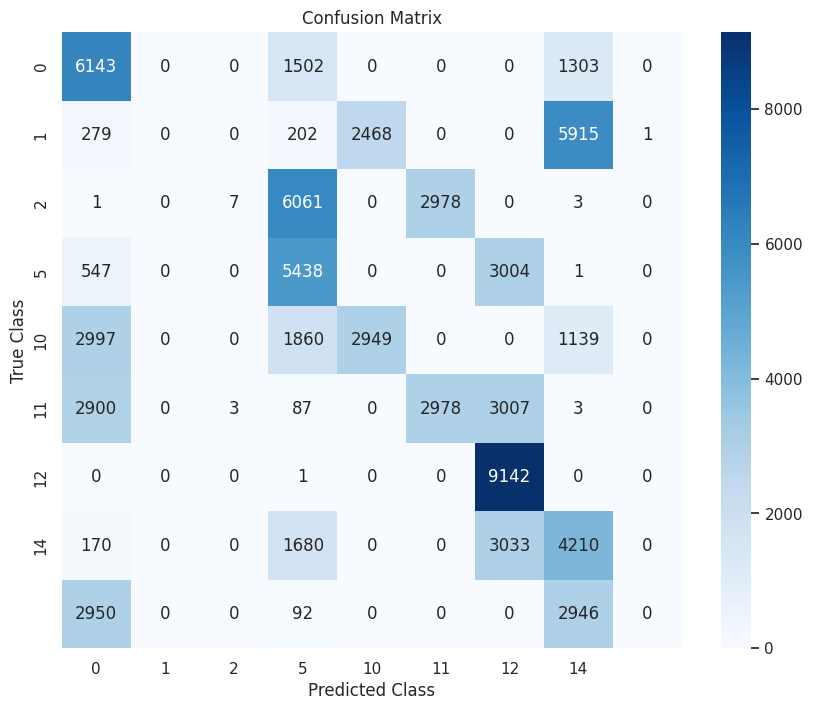

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the global test set
y_pred_global = global_model.predict(X_test_global)
y_pred_classes = np.argmax(y_pred_global, axis=1)
y_true_classes = np.argmax(y_test_global, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
